# Solutions Scripts

In [ ]:
%matplotlib inline

### Exercise 10(c)

In [4]:
import numpy as np
from osgeo import gdal
from osgeo.gdalconst import GDT_Float32

m = 5
simimage = np.zeros((500**2,2))
for i in range(500**2):
    if i % 50000 == 0:
        print(i,end=' ')
    X = np.mat(np.random.randn(m,2))
    Y = np.mat(np.random.randn(m,2))
    Wr = X.T*X + Y.T*Y
    Wi = X.T*Y - Y.T*X
    W = (Wr - 1j*Wi)/2
    simimage[i,0] = np.real(W[0,0])
    simimage[i,1] = np.real(W[0,1])
driver = gdal.GetDriverByName('GTiff')    
outDataset = driver.Create('imagery/enlsim.tif',500,500,2,GDT_Float32) 
for i in range(2):
    outBand = outDataset.GetRasterBand(i+1)
    outBand.WriteArray(np.reshape(simimage[:,i],(500,500)),0,0) 
    outBand.FlushCache()  
outDataset = None    
print('Done')

0 50000 100000 150000 200000 Done


     ENL Estimation
Sat Mar 28 16:11:53 2020
infile:  imagery/enlsim.tif
Diagonal-only polarimetry
filtering...
row: 100 200 300 400 Mode: 4.989600


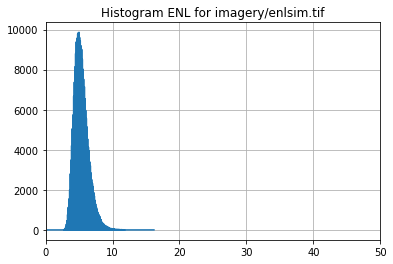

elapsed time: 17.87038540840149


In [8]:
run auxil/enlml imagery/enlsim.tif

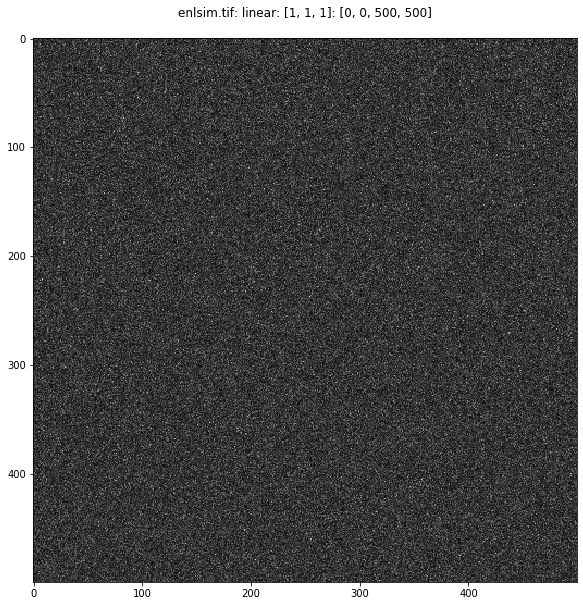

In [6]:
run scripts/dispms -f imagery/enlsim.tif -e 2